In [49]:
import sqlite3
import pandas as pd

Skapa en anslutning till databasfilen med `connect()`-funktionen från `sqlite3`-modulen.

In [50]:
connection = sqlite3.connect("../data/Köksglädje.db")

Definiera en *query* vi vill köra mot databasen. Använd tre citattecken i början och slutet av textsträngen för att kunna behålla radbrytningarna.

In [51]:
query = '''SELECT ProductName, Price FROM Products 
WHERE CategoryName = "Köksknivar";'''

Utför *queryn* och läs in resultatet som en `DataFrame`. Nu kan vi använda funktionaliteten från Pandas för att analysera och visualisera vår data.

In [52]:
df = pd.read_sql(query, connection)

In [53]:
df

,ProductName,Price
0,Kockkniv,999.0
1,Brödkniv,749.0
2,Santokukniv,1199.0
3,Skalkniv,299.0
4,Grönsakskniv,499.0


<Axes: xlabel='ProductName'>

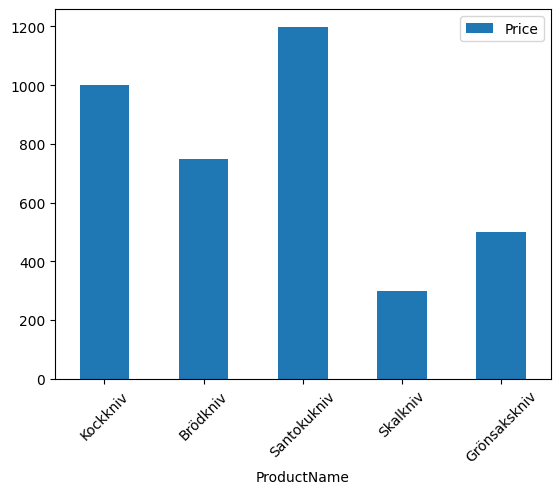

In [54]:
df.plot(kind="bar", x="ProductName", rot=45)

## Joins

Tabellerna i databasen är sammankopplade med nyckelkolumner. Vi kan *joina* dem tillsammans, antingen genom att skapa `DataFrames` och sammanfoga dem med `pd.merge()`-funktionen, eller direkt i SQL med `JOIN`.

### `pd.merge()`
Vi skapar två `DataFrames` och sammanfogar dem genom att ange `TransactionID`-kolumnen som nyckelkolumn med argumentet `on`.

In [55]:
transactions_df = pd.read_sql("SELECT * FROM Transactions", connection)
transaction_details_df = pd.read_sql("SELECT * FROM TransactionDetails", connection)

In [56]:
transactions_df

,TransactionID,StoreID,CustomerID,TransactionDate
0,1,8,62,2021-05-04
1,2,2,11,2021-05-04
2,3,1,66,2021-05-04
3,4,6,23,2021-05-05
4,5,8,75,2021-05-05
...,...,...,...,...
995,996,4,63,2023-12-28
996,997,9,75,2023-12-29
997,998,9,41,2023-12-30
998,999,9,8,2023-12-30


In [57]:
transaction_details_df

,TransactionDetailID,TransactionID,ProductID,Quantity,PriceAtPurchase,TotalPrice
0,1,1,14,1,899.0,899.0
1,2,1,23,3,249.0,747.0
2,3,1,37,1,199.0,199.0
3,4,1,8,1,699.0,699.0
4,5,2,2,1,799.0,799.0
...,...,...,...,...,...,...
2972,2973,997,16,1,149.0,149.0
2973,2974,998,22,1,399.0,399.0
2974,2975,999,36,1,499.0,499.0
2975,2976,999,17,1,299.0,299.0


In [48]:
df2 = pd.merge(transactions_df, transaction_details_df, on="TransactionID")
df2

,index_x,TransactionID,StoreID,CustomerID,TransactionDate,level_0,index_y,TransactionDetailID,ProductID,Quantity,PriceAtPurchase,TotalPrice
0,0,1,8,62,2021-05-04 00:00:00,0,0,1,14,1,899.0,899.0
1,0,1,8,62,2021-05-04 00:00:00,1,1,2,23,3,249.0,747.0
2,0,1,8,62,2021-05-04 00:00:00,2,2,3,37,1,199.0,199.0
3,0,1,8,62,2021-05-04 00:00:00,3,3,4,8,1,699.0,699.0
4,1,2,2,11,2021-05-04 00:00:00,4,4,5,2,1,799.0,799.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2972,996,997,9,75,2023-12-29 00:00:00,2972,2972,2973,16,1,149.0,149.0
2973,997,998,9,41,2023-12-30 00:00:00,2973,2973,2974,22,1,399.0,399.0
2974,998,999,9,8,2023-12-30 00:00:00,2974,2974,2975,36,1,499.0,499.0
2975,998,999,9,8,2023-12-30 00:00:00,2975,2975,2976,17,1,299.0,299.0


### JOIN

Vi kan få i princip samma resultat genom att kombinera tabellerna direkt i SQL med `JOIN`.

In [58]:
pd.read_sql("""
SELECT * FROM Transactions AS T
JOIN TransactionDetails AS TD
ON T.TransactionID = TD.TransactionID;""", connection)

,TransactionID,StoreID,CustomerID,TransactionDate,TransactionDetailID,TransactionID,ProductID,Quantity,PriceAtPurchase,TotalPrice
0,1,8,62,2021-05-04,1,1,14,1,899.0,899.0
1,1,8,62,2021-05-04,2,1,23,3,249.0,747.0
2,1,8,62,2021-05-04,3,1,37,1,199.0,199.0
3,1,8,62,2021-05-04,4,1,8,1,699.0,699.0
4,2,2,11,2021-05-04,5,2,2,1,799.0,799.0
...,...,...,...,...,...,...,...,...,...,...
2972,997,9,75,2023-12-29,2973,997,16,1,149.0,149.0
2973,998,9,41,2023-12-30,2974,998,22,1,399.0,399.0
2974,999,9,8,2023-12-30,2975,999,36,1,499.0,499.0
2975,999,9,8,2023-12-30,2976,999,17,1,299.0,299.0
